# Examples
#### Frederik Kelbel, Imperial College London

### Notes

1. What if we let a Generative Network $G$ sample points in such a way that it maximises the loss of the DGM? --> That makes $G$ adversarial to the DGM-network --> better sampling solution?

## Dependencies

In [1]:
from operators import div, Δ
from DGM import DGMSolver
from pdes import PDE
import argparse
import matplotlib.pyplot as plt
import numpy as np

## Plotting

In [2]:
def plot_losses(losses, avg_over=10):
    plt.plot(np.convolve(losses, np.ones(avg_over), 'valid') / avg_over)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

## Model Configurations

In [3]:
MODEL_CONFIG = {
    "batch_size":128, # minimum batch size is two because of split
    "hidden_dim": 64,
    "learning_rate": 5e-3
}

## Partial Differential Equations

### Declarations

In [4]:
class INVISCID_BURGERS_CONFIG(PDE):
    x_dim = 1
    equation = lambda u, x, t: div(u, t) + u * div(u, x)
    boundary_cond = lambda u, x, t: u*0
    boundary_func = lambda x: x
    init_datum = lambda u, x: x - u

class VISCOUS_BURGERS_CONFIG(PDE):
    x_dim = 2
    equation = lambda u, x, t: div(u, t) + u * div(u, x) - 0.5 * Δ(u, x)
    boundary_cond = lambda u, x, t: u
    boundary_func = lambda x: 1.0 if x > 0.5 else 0.0
    init_datum = lambda u, x: x - u

class RICCATI_CONFIG(PDE):
    x_dim = 2
    a = lambda x: x
    b = lambda x: x
    c = lambda x: x
    equation = lambda u, x, t: a(x) * u + b(x) * u + c(x) - div(u, t)
    boundary_cond = lambda u, x, t: u*0
    boundary_func = lambda x: x
    init_datum = lambda u, x: x - u

### Solutions for Reference

In [5]:
BURGERS_CONFIG_sol = lambda x, t: x / (1 + t)

## Experiments

### 1. Solving the Inviscid Burgers' Equation:

100%|██████████| 1000/1000 [00:02<00:00, 370.20 it/s]


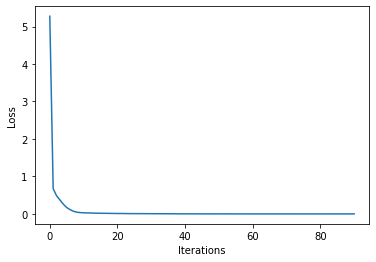

In [6]:
eq_1 = INVISCID_BURGERS_CONFIG
model_1 = MODEL_CONFIG
solver_1 = DGMSolver(model_1, eq_1)
losses_1 = list(solver_1.train(1000))
plot_losses(losses_1)

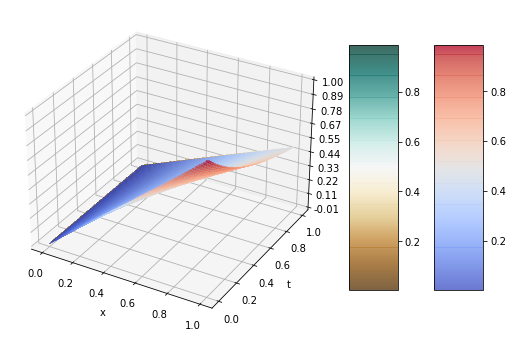

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

if eq_1.x_dim==1:
    fig = plt.figure(figsize=(9, 9))
    ax = fig.gca(projection='3d')
    xs = np.linspace(0, 1, 100)
    ts = np.linspace(0, 1, 100)
    us_pred = np.array([[solver_1.u(x, t) for x in xs] for t in ts])
    x_mesh, t_mesh = np.meshgrid(xs, ts)
    us = BURGERS_CONFIG_sol(x_mesh, t_mesh)
    surf_pred = ax.plot_surface(x_mesh, t_mesh, us_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.5)
    surf_sol = ax.plot_surface(x_mesh, t_mesh, us, cmap=cm.BrBG,
                       linewidth=0, antialiased=False, alpha=0.5)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf_pred, shrink=0.5, aspect=5)
    fig.colorbar(surf_sol, shrink=0.5, aspect=5)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("u")
    plt.show()

### 2. Solving the Viscous Burgers' Equation:

100%|██████████| 1500/1500 [00:05<00:00, 269.67 it/s]


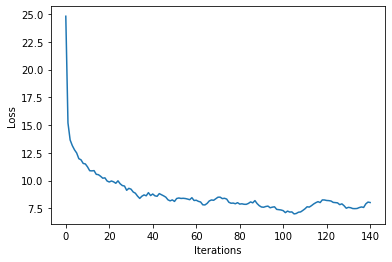

In [8]:
eq_2 = VISCOUS_BURGERS_CONFIG
model_2 = MODEL_CONFIG
solver_2 = DGMSolver(model_2, eq_2)
losses_2 = list(solver_2.train(1500))
plot_losses(losses_2)